# EDA (exploratory data analysis) project:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#dataset
df=pd.read_csv("Hotel Bookings.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.shape

(119390, 32)

In [7]:
missing_val=pd.DataFrame(df.isnull().sum()).rename(columns={0:"no. of missing value"})
missing_val

,no. of missing value
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [8]:
#missing values in percentage and sorting
missing_val['percentage']=(missing_val['no. of missing value']/len(df))*100
missing_val.sort_values('percentage',ascending=False,inplace=True)
missing_val

,no. of missing value,percentage
company,112593,94.306893
agent,16340,13.686238
country,488,0.408744
children,4,0.003350
reserved_room_type,0,0.000000
assigned_room_type,0,0.000000
booking_changes,0,0.000000
deposit_type,0,0.000000
hotel,0,0.000000
previous_cancellations,0,0.000000


In [9]:
df.duplicated().sum()

31994

In [10]:
#removed duplicates values
df=df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

Text(0.5, 1.0, 'Graph of Number of null values with respect to its Variable')

<Figure size 700x700 with 0 Axes>

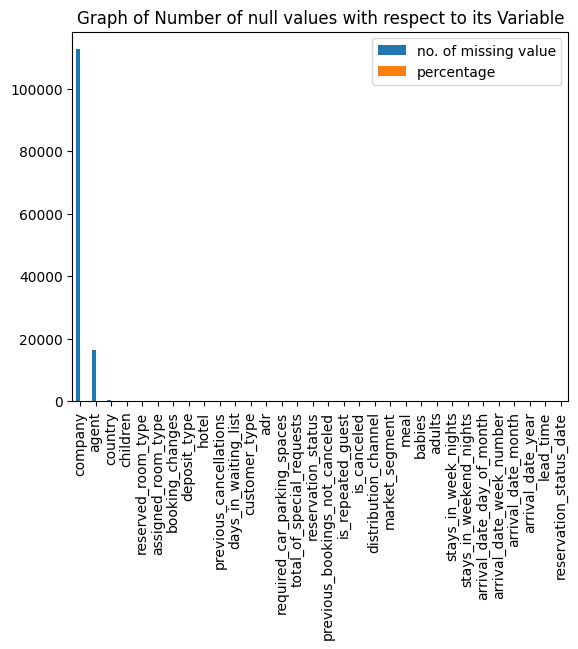

In [12]:
plt.figure(figsize=(7,7))
missing_val.plot(kind='bar')
plt.title('Graph of Number of null values with respect to its Variable')

In [13]:
# Dropping variable having more than 50% null values
#df.drop(columns='company', inplace=True)

In [14]:
df['agent'].value_counts()

agent
9.0      28759
240.0    13028
14.0      3349
7.0       3300
250.0     2779
         ...  
497.0        1
337.0        1
510.0        1
165.0        1
449.0        1
Name: count, Length: 333, dtype: int64

In [15]:
df['children'].value_counts()

children
0.0     79028
1.0      4695
2.0      3593
3.0        75
10.0        1
Name: count, dtype: int64

In [16]:
df['country'].value_counts()

country
PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: count, Length: 177, dtype: int64

In [17]:
# Replacing null values with the most frequent value in a variable   #[0] means first mode
df['agent']=df['agent'].fillna(df['agent'].mode()[0])
df['children']=df['children'].fillna(df['children'].mode()[0])
df['country']=df['children'].fillna(df['children'].mode()[0])

C:\Users\krraj\AppData\Local\Temp\ipykernel_13180\3029625233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['agent']=df['agent'].fillna(df['agent'].mode()[0])
C:\Users\krraj\AppData\Local\Temp\ipykernel_13180\3029625233.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['children']=df['children'].fillna(df['children'].mode()[0])
C:\Users\krraj\AppData\Local\Temp\ipykernel_13180\3029625233.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [18]:
# Check for null values are removed
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                               0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                                 0
company                           82137


In [21]:
categorical_data=[i for i in df.columns if df[i].dtypes=='O']
print(f"dataset having {len(categorical_data)} categorical variables")
print('---'*39)
print(categorical_data)

dataset having 11 categorical variables
---------------------------------------------------------------------------------------------------------------------
['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


In [23]:
numerical_data=[i for i in df.columns if df[i].dtypes!='O']
print(f"dataset having {len(numerical_data)} numerical variables")
print('---'*39)
print(numerical_data)

dataset having 21 numerical variables
---------------------------------------------------------------------------------------------------------------------
['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'country', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [20]:
#Continuous Variables:::Continuous variables are numerical variables that can take on an infinite number of values within a
#certain range. They are measured and represented on a continuous scale without interruption. 




#Discrete variables>>>>>  often represent counts or frequencies of different" categories or events. 
#The number of students in a classroom
#The number of cars in a parking lot
#The number of goals scored in a soccer match
#The number of items sold in a store
#The number of children in a family

In [51]:
# Obtaining Descrete varibles from Numerical varibles
descrete_data=[]
for i in numerical_data:
    if len(df[i].value_counts())<=150:
        descrete_data.append(i)
        print(i,":",df[i].unique())
        print("__"*39)
              
print(f"dataset having {len(descrete_data)} descrete variables")

is_canceled : [0 1]
______________________________________________________________________________
arrival_date_year : [2015 2016 2017]
______________________________________________________________________________
arrival_date_week_number : [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21
 22 23 24 25 26]
______________________________________________________________________________
arrival_date_day_of_month : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
______________________________________________________________________________
stays_in_weekend_nights : [ 0  1  2  4  3  6 13  8  5  7 12  9 16 18 19 10 14]
______________________________________________________________________________
stays_in_week_nights : [ 0  1  2  3  4  5 10 11  8  6  7 15  9 12 33 20 14 16 21 13 30 19 24 40
 22 42 50 25 17 32 26 18 34 35 41]
________________________

In [22]:
# Obtaining contineous variables from numerical variables
continuous_data=[i for i in numerical_data if i not in descrete_data]
print(f"dataset having {len(continuous_data)} continuous variables")
print(" "*39)
print(continuous_data)

dataset having 4 continuous variables
                                       
['lead_time', 'agent', 'company', 'adr']


C:\Users\krraj\AppData\Local\Temp\ipykernel_19424\740590818.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df[i])


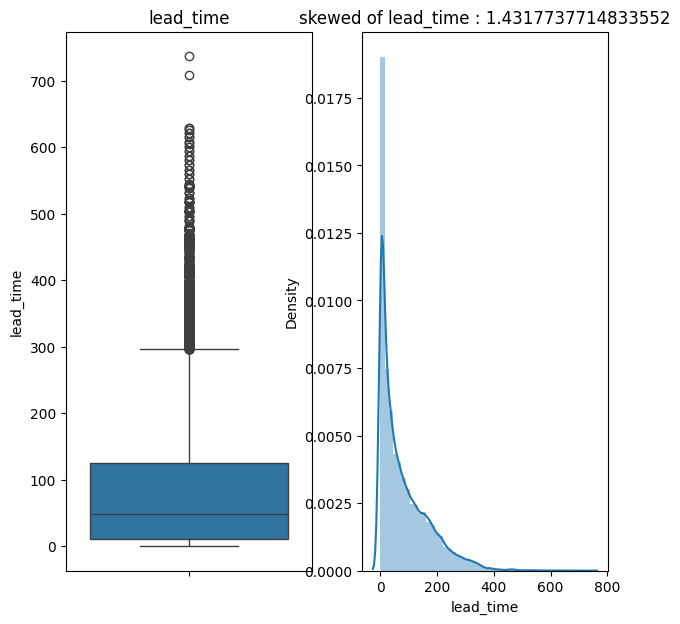

C:\Users\krraj\AppData\Local\Temp\ipykernel_19424\740590818.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df[i])


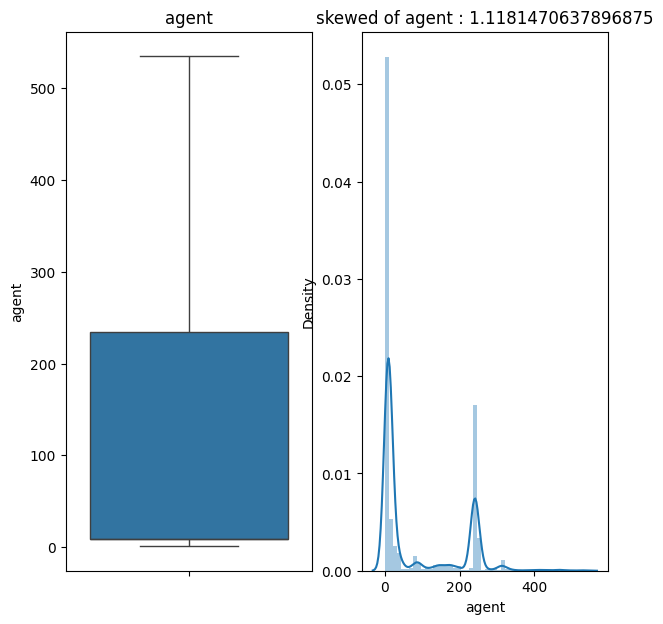

C:\Users\krraj\AppData\Local\Temp\ipykernel_19424\740590818.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df[i])


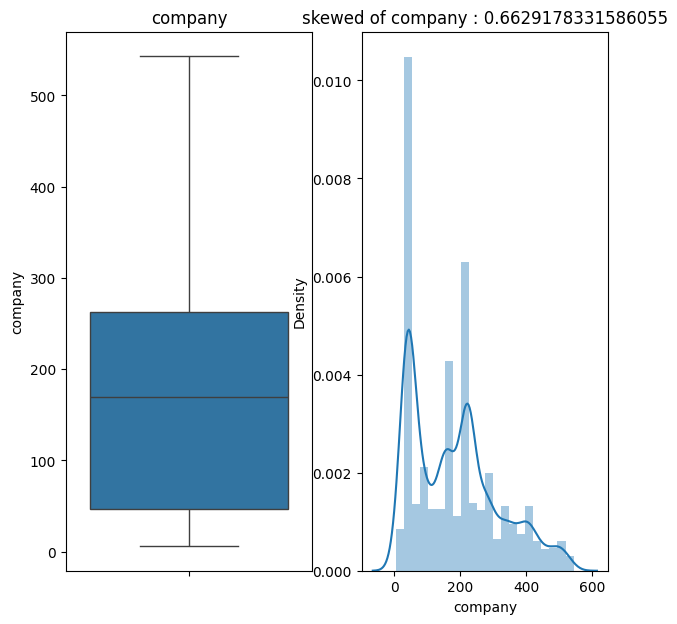

C:\Users\krraj\AppData\Local\Temp\ipykernel_19424\740590818.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df[i])


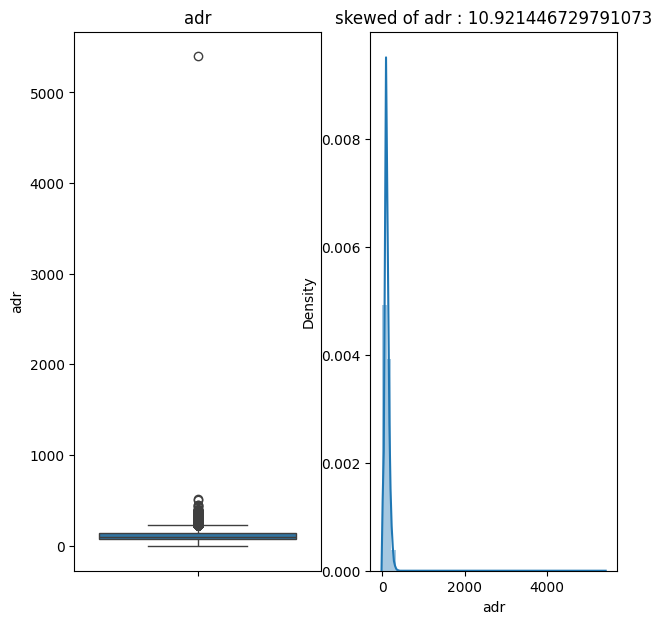

In [23]:
for i in continuous_data:
    plt.figure(figsize=(7,7))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[i])
    ax.set_title(f"{i}")
    ax.set_ylabel(i)
    
    
    plt.subplot(1,2,2)
    ax=sns.distplot(df[i])
    ax.set_title(f"skewed of {i} : {df[i].skew()}")
    ax.set_xlabel(i)
    plt.show()

In [32]:
outlier_columns=["lead_time" , "adr"]
outlier_columns

['lead_time', 'adr']

In [33]:
new_df=df.copy()

In [26]:
for i in outlier_columns:
    q1=new_df[i].quantile(0.25)
    q3=new_df[i].quantile(0.75)
    IQR=q3-q1
    print(IQR)
    
    lower_limit=new_df[i].quantile(0.25)-1.5*IQR
    upper_limit=new_df[i].quantile(0.75)+1.5*IQR
    
    new_df.loc[(new_df[i]> upper_limit),i]=upper_limit
    new_df.loc[(new_df[i]< lower_limit),i]=lower_limit

114.0
62.0


C:\Users\krraj\AppData\Local\Temp\ipykernel_19424\3078617518.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(new_df[i],fit=norm)


____________________________________________________________________________________________________


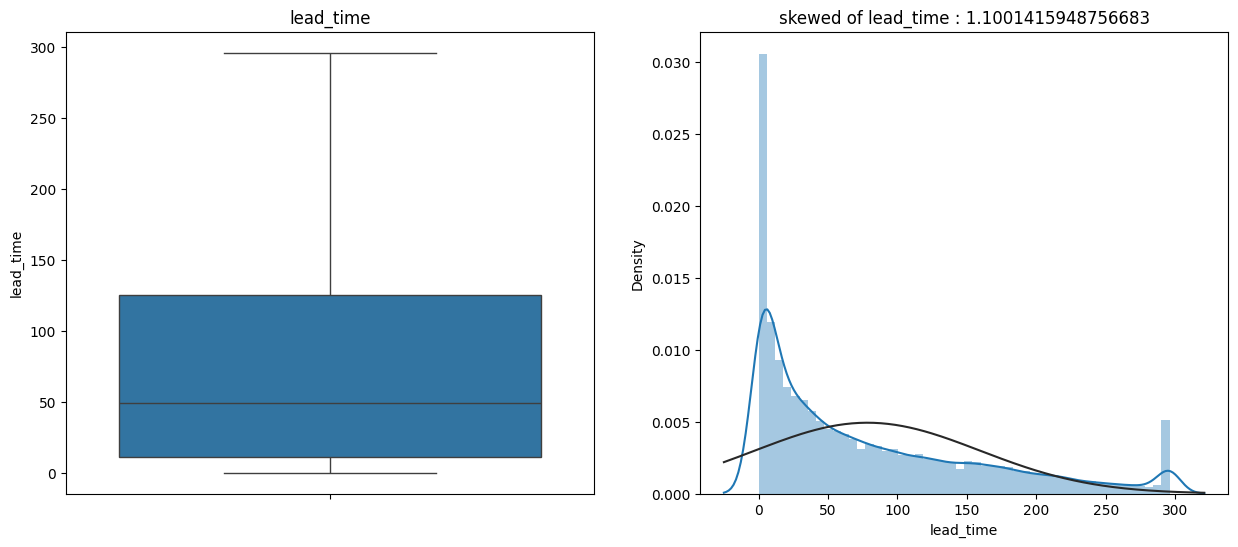

C:\Users\krraj\AppData\Local\Temp\ipykernel_19424\3078617518.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(new_df[i],fit=norm)


____________________________________________________________________________________________________


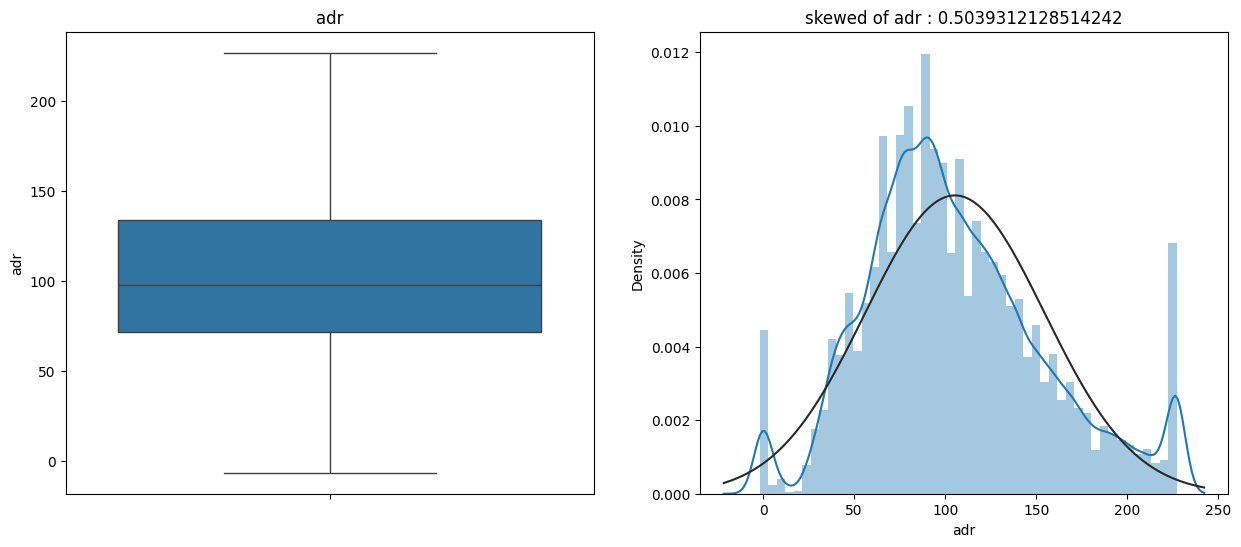

In [27]:
# Checking for outliers for continuous variables
from scipy.stats import norm
for i in outlier_columns:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=new_df[i])
    ax.set_title(f"{i}")
    ax.set_ylabel(i)
    
    
    plt.subplot(1,2,2)
    ax=sns.distplot(new_df[i],fit=norm)
    ax.set_title(f"skewed of {i} : {new_df[i].skew()}")
    ax.set_xlabel(i)
    print("__"*50)
    plt.show()

In [28]:
new_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,...,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,5259.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,78.363987,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,...,0.039075,0.030413,0.183990,0.271603,82.260287,183.081384,0.749565,105.344502,0.084226,0.698567
std,0.446466,81.047312,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,...,0.193775,0.369145,1.731894,0.727245,109.061182,130.557608,10.015731,49.190333,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,47.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,169.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,234.000000,263.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,296.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,227.000000,8.000000,5.000000


In [29]:
#dataset
new_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,296,2015,July,27,1,0,0,2,...,No Deposit,9.0,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,296,2015,July,27,1,0,0,2,...,No Deposit,9.0,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,9.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [30]:
for i in new_df.columns:
    print(f"{i}:{new_df[i].unique()}")
    print("__"*46)

hotel:['Resort Hotel' 'City Hotel']
____________________________________________________________________________________________
is_canceled:[0 1]
____________________________________________________________________________________________
lead_time:[296   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78  48
  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113  90
  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81  79  21 109
 102   4  98  92  26  73 115  86  52  29  30  33  32   8 100  44  80  97
  64  39  34  27  82  94 110 111  84  66 104  28 258 112  65  67  55  88
  54 292  83 105 280  24 103 249  22  91  11 108 106  31  87  41 117  59
  53  58 116  42  38  56  49   6  57  19  25 123  46  89  61 130  74 119
  20 286 136 129 124 131 140 114 139 122 137 126 120 128 135 150 143 151
 132 125 157 147 138 156 164 159 160 161 149 154 163 155 142 144 248 175
 146 170 166 167 148 165 172 171 145 121 178 173 152 158 185 183 177 200
 192 207 174 134 283

In [31]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            8739

In [32]:
new_df[["children","agent"]]=new_df[["children","agent"]].astype("int64")

In [33]:
new_df["reservation_status_date"]=pd.to_datetime(new_df["reservation_status_date"], format="%Y-%m-%d")

In [34]:
#check datatypes
new_df[["children","agent","reservation_status_date"]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   children                 87396 non-null  int64         
 1   agent                    87396 non-null  int64         
 2   reservation_status_date  87396 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.7 MB


In [35]:
new_df['total_stays']=new_df['stays_in_weekend_nights']+new_df['stays_in_week_nights']

In [36]:
new_df['total_people']=new_df['adults']+new_df['children']+new_df['babies']

In [37]:
new_df['total_childrens']=df['children']+new_df['babies']

In [38]:
new_df['reserved_room_assigned']=np.where(new_df['reserved_room_type']==new_df['assigned_room_type'],'yes' ,"no")

In [39]:
new_df['guest_category']=np.where(new_df['total_people']==1,'single',
                                 np.where(new_df['total_people']==2,"couple","family"))

In [40]:
new_df['lead_time_category']=np.where(new_df['lead_time']<=15,"low",
                                     np.where((new_df['lead_time']>15)&(new_df['lead_time']<90),"medium","high"))

In [41]:
#check dataset
new_df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays,total_people,total_childrens,reserved_room_assigned,guest_category,lead_time_category
0,Resort Hotel,0,296,2015,July,27,1,0,0,2,...,0,0,Check-Out,2015-07-01,0,2,0.0,yes,couple,high
1,Resort Hotel,0,296,2015,July,27,1,0,0,2,...,0,0,Check-Out,2015-07-01,0,2,0.0,yes,couple,high
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Check-Out,2015-07-02,1,1,0.0,no,single,low
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Check-Out,2015-07-02,1,1,0.0,yes,single,low
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,1,Check-Out,2015-07-03,2,2,0.0,yes,couple,low


In [42]:
new_df.shape

(87396, 38)

In [43]:
new_df.drop(new_df[new_df['total_people']==0].index,inplace=True)

In [44]:
new_df.shape

(87230, 38)

In [45]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87230 entries, 0 to 119389
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87230 non-null  object        
 1   is_canceled                     87230 non-null  int64         
 2   lead_time                       87230 non-null  int64         
 3   arrival_date_year               87230 non-null  int64         
 4   arrival_date_month              87230 non-null  object        
 5   arrival_date_week_number        87230 non-null  int64         
 6   arrival_date_day_of_month       87230 non-null  int64         
 7   stays_in_weekend_nights         87230 non-null  int64         
 8   stays_in_week_nights            87230 non-null  int64         
 9   adults                          87230 non-null  int64         
 10  children                        87230 non-null  int64         
 11  babies

In [46]:
#Coverting datatype of variables total_people and total_childrens to int64 from float64
new_df['total_people']=new_df['total_people'].astype("int64")
new_df['total_childrens']=new_df['total_childrens'].astype("int64")

In [47]:
#check
new_df[['total_people','total_childrens']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 87230 entries, 0 to 119389
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   total_people     87230 non-null  int64
 1   total_childrens  87230 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


# Insights

The variables "children," "agent," "reservation_status_date," "total_people," and "total_children" do not have the correct datatype format. So they are transformed from float64 datatypes to int64. The variable "reservation_status_date" was transformed from object datatype to datetime64.


For more convenience in the dataset, "total_stays" and "total_people" variables are created. By adding the variables "stays_in_weekend_nights" and "stays_in_weeknights," the variable "total_stays" is created. The variables "adults," "children," and "babies" are combined, the variable "total_people" is created. 

The variable "reserved_room_assigned" is made up of the variables "reserved_room_type" and "assigned_room_type," which describe whether or not a reserved room for a customer has been assigned. From variables "children" and "babies," a new "total_children" variable is created by adding both of them.

The variable "total_people" was used to create "guest_category," which describes bookings made for individuals, couples, or families. The variable 'lead_time_category' was created from the variable 'lead_time' to display lead time as low, medium, and high. 

Variable "total_people" cannot be 0, so observations in total_people having 0 values are dropped.

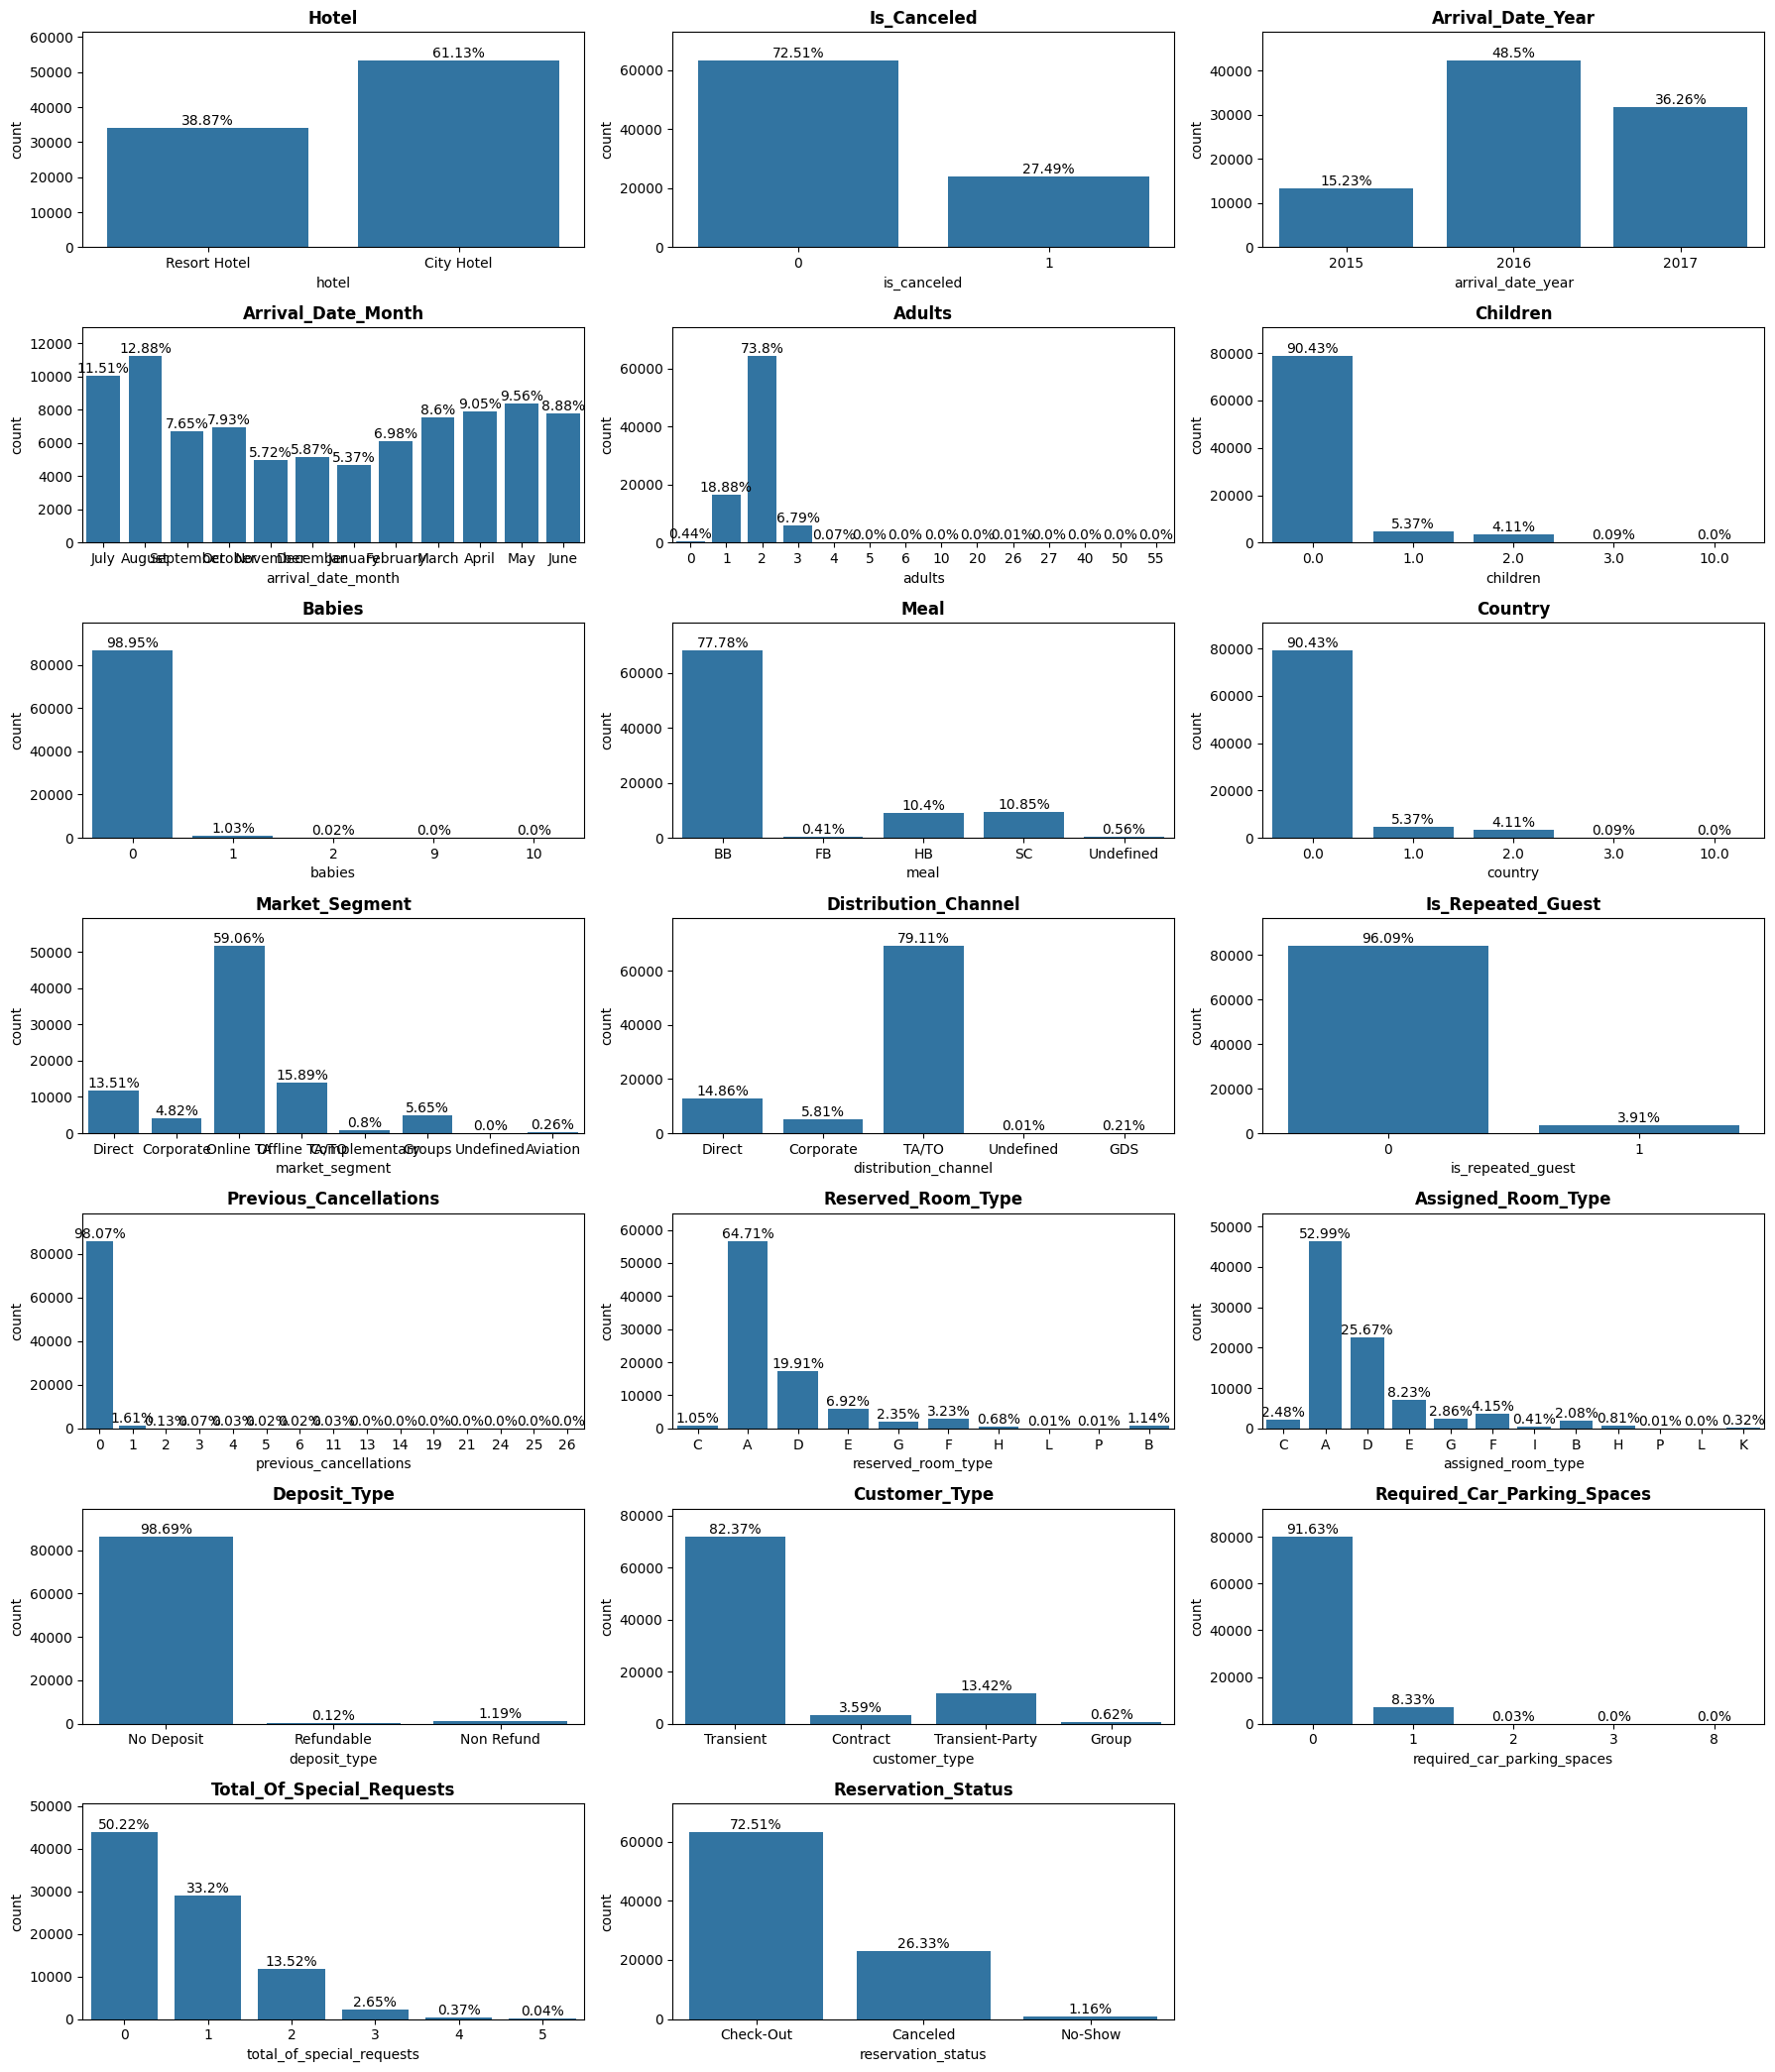

In [60]:
excluded_variables=[i for i in new_df.columns if len(new_df[i].value_counts()) > 15]
target_variables=[i for i in new_df.columns if i not in excluded_variables]

r = int(len(target_variables)/3 +1)


def annot_percent(axes):
    '''Takes axes as input and labels the percent count of each bar in a countplot'''
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')
        
        
plt.figure(figsize=(18,r*3))
for n,var in enumerate(target_variables):
    plot = plt.subplot(r,3,n+1)
    sns.countplot(x=new_df[var]).margins(y=0.15)
    plt.title(f'{var.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot)    